In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

# jakaa datan opetus- ja testidataan 
from sklearn.model_selection import train_test_split

# käytettävät mallit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# mallien hyvyyden arviointiin
from sklearn.metrics import r2_score

# perinteiset tulostukset
import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_excel('Concrete_Data.xlsx')

# lyhennetään kolumnien nimiä vähän
df.columns.name = ''
nimet = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 
         'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Concrete compressive strength']
df.columns = nimet
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [3]:
# katsotaan ensimmäiseksi korrelaatioita
correlation_matrix = df.corr().round(2)
correlation_matrix

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
Cement,1.00,-0.28,-0.40,-0.08,0.09,-0.11,-0.22,0.08,0.50
Blast Furnace Slag,-0.28,1.00,-0.32,0.11,0.04,-0.28,-0.28,-0.04,0.13
Fly Ash,-0.40,-0.32,1.00,-0.26,0.38,-0.01,0.08,-0.15,-0.11
Water,-0.08,0.11,-0.26,1.00,-0.66,-0.18,-0.45,0.28,-0.29
Superplasticizer,0.09,0.04,0.38,-0.66,1.00,-0.27,0.22,-0.19,0.37
Coarse Aggregate,-0.11,-0.28,-0.01,-0.18,-0.27,1.00,-0.18,-0.00,-0.16
Fine Aggregate,-0.22,-0.28,0.08,-0.45,0.22,-0.18,1.00,-0.16,-0.17
Age,0.08,-0.04,-0.15,0.28,-0.19,-0.00,-0.16,1.00,0.33
Concrete compressive strength,0.50,0.13,-0.11,-0.29,0.37,-0.16,-0.17,0.33,1.00


Cement, Water, Superplasticizer ja Age korreloivat vahvimmin betonin lujuuden kanssa. 

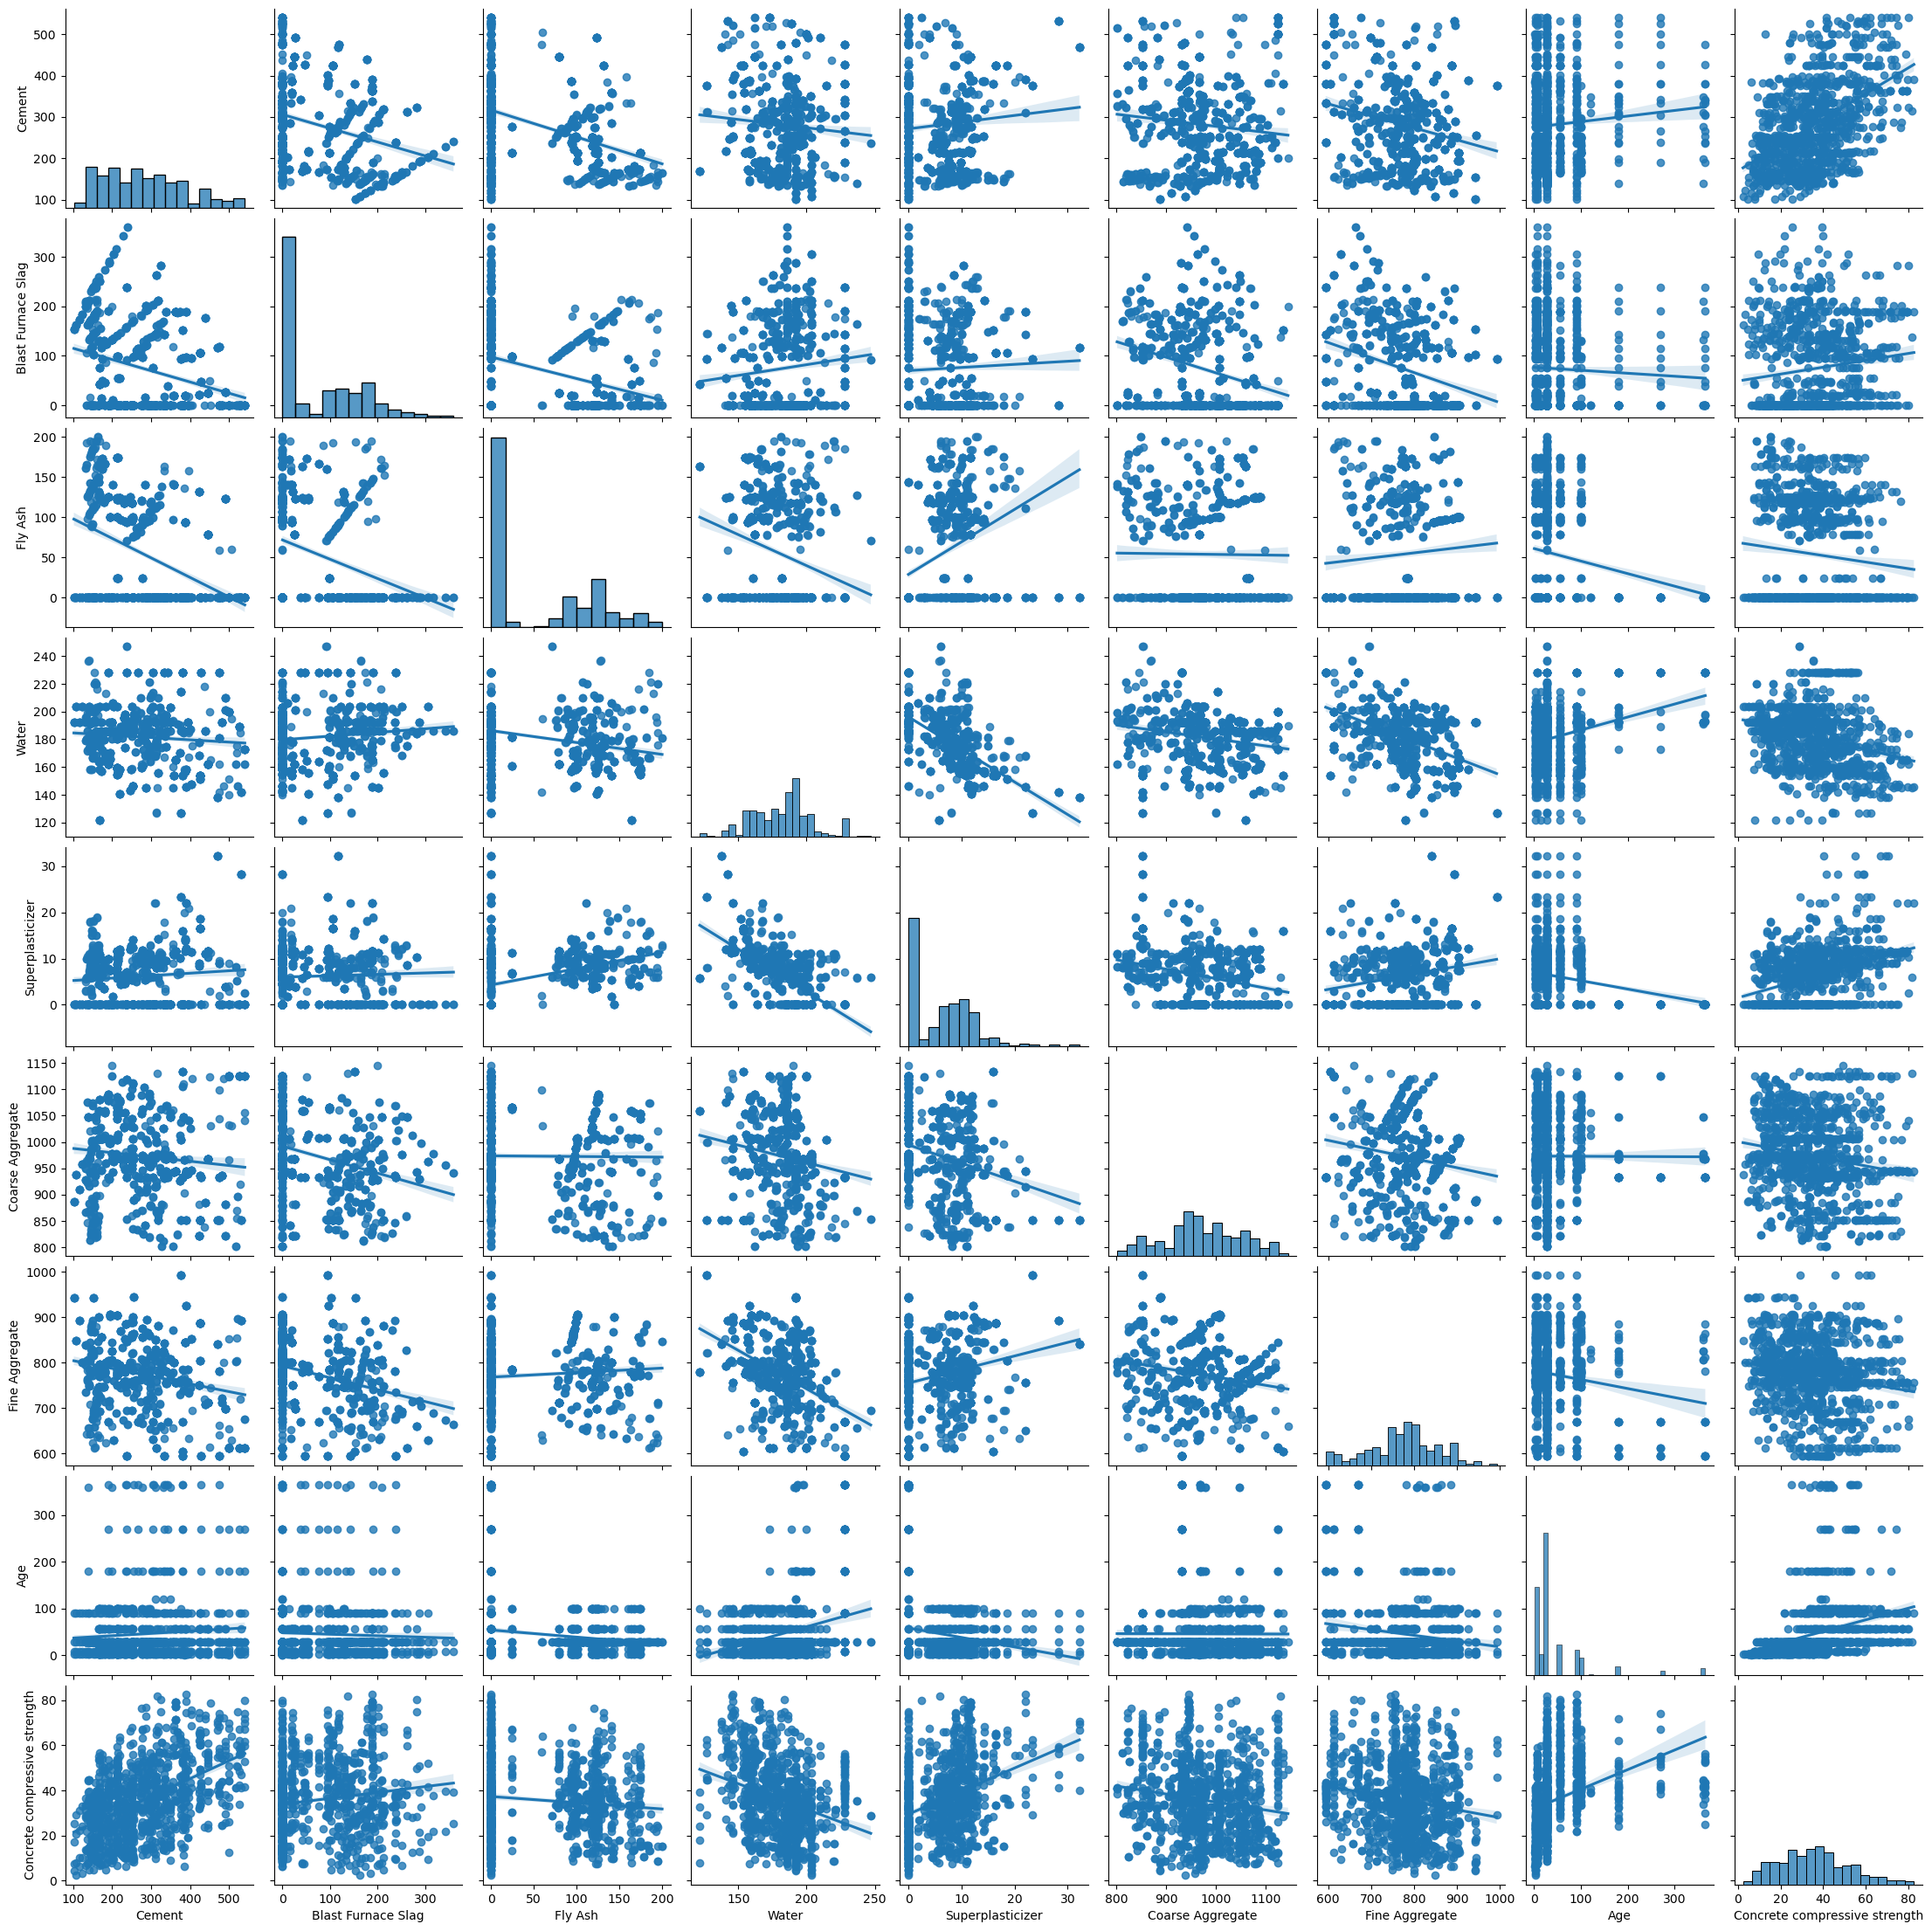

In [4]:
sns.pairplot(df, kind='reg')

Cement, Water, Superplasticizer ja Age-muuttujakombolla tulokset eivät olleet kovin korkeita, joten tiputin Superplasticizerin pois ja testailin muita muuttujia. Blast Furnace Slag näytti jakavan dataa mukavasti yllä olevassa pairplotissa, ja sen lisäämällä sain parhaimmat tulokset. 

In [5]:
# selittävät muuttujat
seli = ['Water', 'Age', 'Blast Furnace Slag', 'Cement']
X = df[seli]

# selitettävä muuttuja
y = df['Concrete compressive strength']

# jako opetus- ja testidataan
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [6]:
R2_train = []
R2_test = []

def mallinna(malli):
	# sovitus
	malli.fit(X_train, y_train)

	# selityskerrroin opetusdatalle
	y_pred_train = malli.predict(X_train)
	R2_train_malli = r2_score(y_train, y_pred_train)
	R2_train.append(round(R2_train_malli, 2))

	# selityskerroin testidatalle
	y_pred_test = malli.predict(X_test)
	R2_test_malli = r2_score(y_test, y_pred_test)
	R2_test.append(round(R2_test_malli, 2))

	# selityskertoimien tulostus
	print('Opetusdatan selityskerroin: ', round(R2_train_malli, 2))
	print('Testidatan selityskerroin: ', round(R2_test_malli, 2))	

	# opetusdatan virhetermit kaaviona
	fig, ax = plt.subplots(1, 2, figsize = (10,4))
	ax[0].set_title('Ennustevirheiden jakauma opetusdatassa')
	sns.histplot((y_train - y_pred_train), kde = True, ax = ax[0])
	ax[0].set_xlabel('y_train - y_pred_train')

	# toteutuneet ja ennustetut hajontakaaviona testidatalle
	ax[1].set_title('Toteutuneet ja ennustetut testidatassa')
	ax[1].scatter(x = y_test, y = y_pred_test)
	ax[1].set_xlabel('Toteutunut')
	ax[1].set_ylabel('Ennuste')


### Lineaarinen regressio

Opetusdatan selityskerroin:  0.57
Testidatan selityskerroin:  0.52


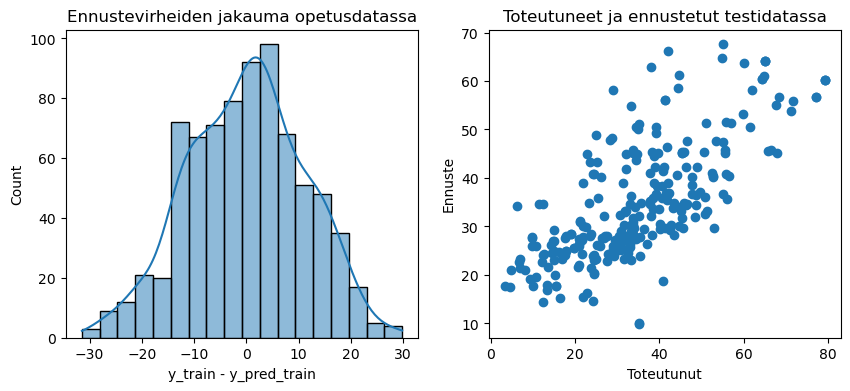

In [7]:
malli = LinearRegression()
mallinna(malli)

Lineaarinen regressio toimii huonoimmin tämän datan kanssa, vaikka selittäviä muuttujia vekslaisi vaikka miten. 

### Satunnaismetsä

Opetusdatan selityskerroin:  0.98
Testidatan selityskerroin:  0.9


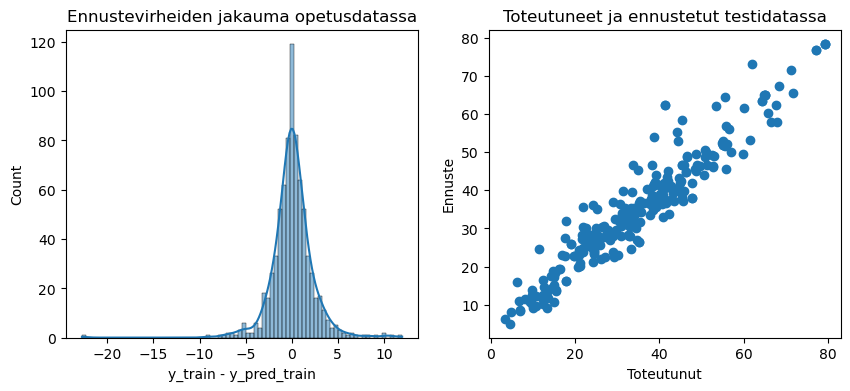

In [8]:
malli = RandomForestRegressor()
mallinna(malli)

Satunnaismetsä toimii todella hyvin! 

### Gradienttitehostus

Opetusdatan selityskerroin:  0.93
Testidatan selityskerroin:  0.88


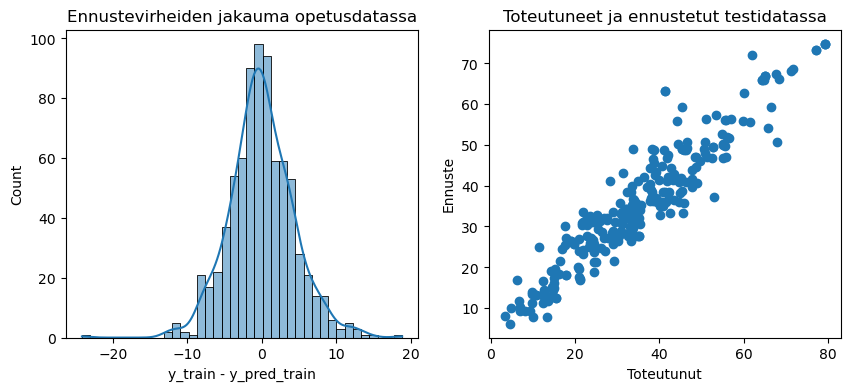

In [9]:
malli = GradientBoostingRegressor()
mallinna(malli)

In [10]:
# yhteenveto
menetelmä = ['LinearRegression', 'RandomForestRegressor', 'GradientBoostingRegressor']
pd.DataFrame({'Malli': menetelmä, 'Selityskerroin (opetusdata)': R2_train, 'Selityskerroin (testidata)': R2_test})

,Malli,Selityskerroin (opetusdata),Selityskerroin (testidata)
0,LinearRegression,0.57,0.52
1,RandomForestRegressor,0.98,0.90
2,GradientBoostingRegressor,0.93,0.88


Lineaarinen regressio pärjäsi huonoimmin ja satunnaismetsä parhaiten. Gradienttitehostus pärjäsi myös ihan kiitettävästi. 